<a href="https://colab.research.google.com/github/sudar-coder321/Reason_For_Absence_to_Work_Clustering_and_Analysis/blob/main/Reason_For_Absence_to_Work_Clustering_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import sklearn
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [ ]:
!pip install scikit-learn-extra

In [ ]:
!pip install apyori

In [ ]:
data = pd.read_excel('Absenteeism_at_work.xls')

In [ ]:
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35,0


In [ ]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [ ]:
data.isnull()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
736,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
737,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
738,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
data.dropna()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35,0


In [ ]:
data = data.drop_duplicates()

In [ ]:
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35,0


In [ ]:
data = data.drop(columns = ['ID'])

In [ ]:
data

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,90,172,30,8
736,11,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,88,172,29,4
737,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34,0
738,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35,0


In [ ]:
list(data.columns)

['Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

## DB-SCAN

In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [ ]:
x=data.iloc[:,[18,19]].values

In [ ]:
x=data.values

In [ ]:
model=db.fit(x)

In [ ]:
label=model.labels_

In [ ]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1,  1,  1,  0,  1,
        0,  0,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [ ]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 8


In [ ]:
y_means = db.fit_predict(x)

In [ ]:
y_means

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1,  1,  1,  0,  1,
        0,  0,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [ ]:
data

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,90,172,30,8
736,11,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,88,172,29,4
737,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34,0
738,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35,0


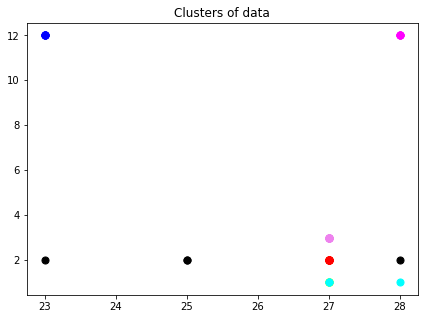

In [ ]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'violet')
plt.title('Clusters of data')
plt.show()


## K-Medoid

In [ ]:
temp = pd.DataFrame(data,columns=['Body mass index','Absenteeism time in hours'])

In [ ]:
temp

,Body mass index,Absenteeism time in hours
0,30,4
1,31,0
2,31,2
3,24,4
4,30,2
...,...,...
735,30,8
736,29,4
737,34,0
738,35,0


In [ ]:
cobj = KMedoids(n_clusters=8).fit(data)
labels = cobj.labels_

Text(0.5, 1.0, 'KMedoids clustering. The Medoids have been represented in blue.')

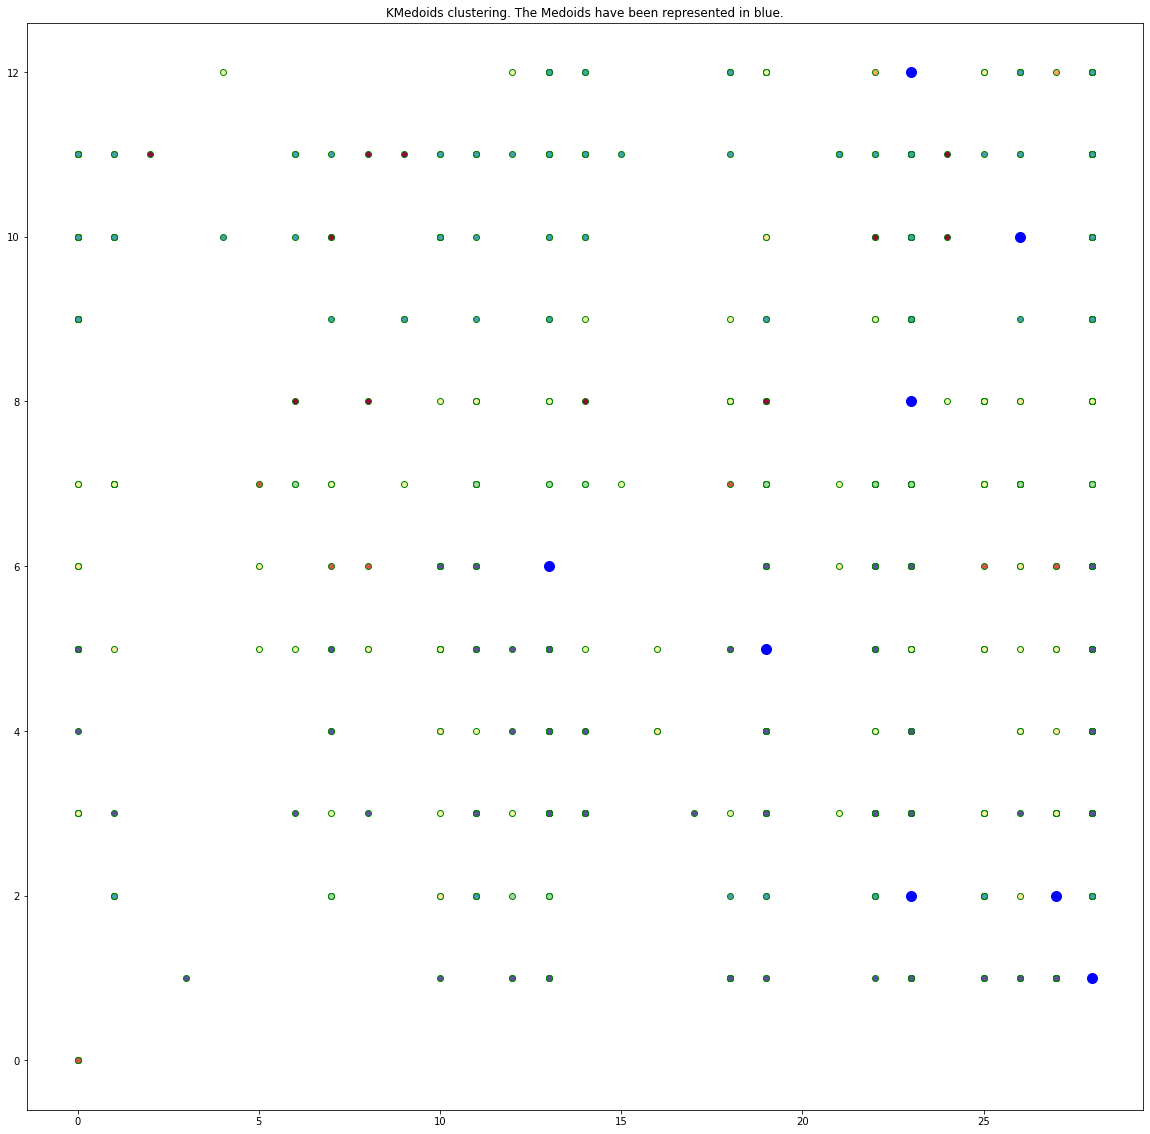

In [ ]:
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
plt.figure(figsize=(20,20))
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = data[class_member_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="g",
        markersize=6,
    )

plt.plot(
    cobj.cluster_centers_[:, 0],
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="blue",
    markeredgecolor="b",
    markersize=10,
)
plt.title("KMedoids clustering. The Medoids have been represented in blue.")

In [ ]:
!pip install -U scikit-learn scipy matplotlib

### Silhoutte Score

In [ ]:
sklearn.metrics.silhouette_score(data, labels,metric='euclidean', sample_size=None, random_state=None)

0.3697459864899685

## Davis-Boudin Score

In [ ]:
sklearn.metrics.davies_bouldin_score(data, labels)

0.6418243320720165

In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
!pip install factor_analyzer

     |████████████████████████████████| 41 kB 278 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=93415936cf199581ebe3b72521ce59ab2e1624c91662280a842e7ab348e589da
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(7020.764649423758, 0.0)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)

In [ ]:
fa = FactorAnalyzer()
fa.fit(data)
eigen_values, vectors = fa.get_eigenvalues()

In [ ]:
eigen_values

array([3.29174964e+00, 2.26431626e+00, 1.89689441e+00, 1.54446428e+00,
       1.43035953e+00, 1.30382352e+00, 1.14141631e+00, 1.02555647e+00,
       9.67675312e-01, 9.32645496e-01, 8.19619509e-01, 7.58099028e-01,
       6.56232580e-01, 4.63529993e-01, 4.11925124e-01, 3.69958984e-01,
       3.06363349e-01, 2.41554081e-01, 1.71027374e-01, 2.78875517e-03])

In [ ]:
vectors

array([ 2.83725008,  1.61443472,  1.25778131,  0.80522268,  0.67897329,
        0.54057903,  0.35016834,  0.17883583,  0.15351226,  0.07664095,
       -0.00563989, -0.02029415, -0.11789465, -0.2317558 , -0.28509991,
       -0.30570528, -0.31489717, -0.38338828, -0.49633009, -0.59114289])

In [ ]:
fa.get_factor_variance()

(array([2.77078293, 1.68931052, 1.28115692]),
 array([0.13853915, 0.08446553, 0.06405785]),
 array([0.13853915, 0.22300467, 0.28706252]))

### Analysis of effect of 5 Attributes with Reason for Absence

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


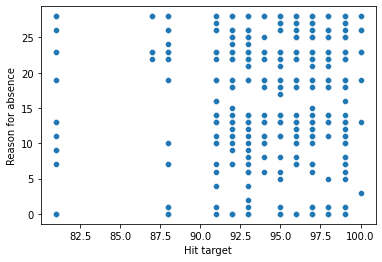

In [ ]:
sns.scatterplot(data['Hit target'], y=data['Reason for absence'], data=data);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


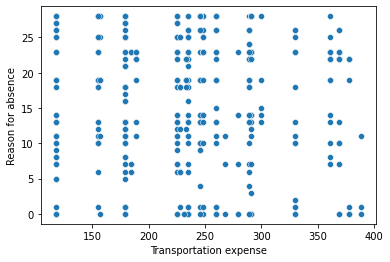

In [ ]:
sns.scatterplot(data['Transportation expense'], y=data['Reason for absence'], data=data);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


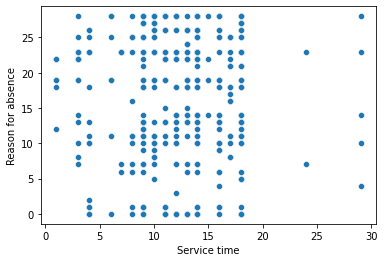

In [ ]:
sns.scatterplot(data['Service time'], y=data['Reason for absence'], data=data);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


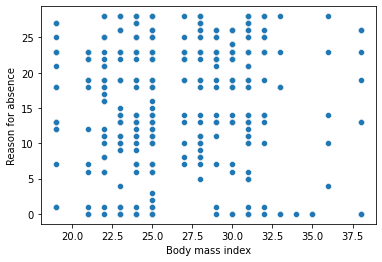

In [ ]:
sns.scatterplot(data['Body mass index'], y=data['Reason for absence'], data=data);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


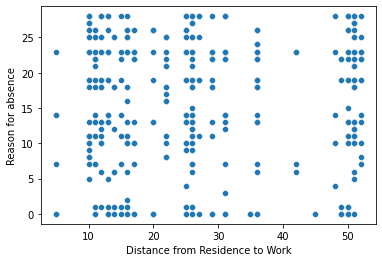

In [ ]:
sns.scatterplot(data['Distance from Residence to Work'], y=data['Reason for absence'], data=data);

### Correlation Of Distance from Residence to Work to Reason for absence


In [ ]:
pd.DataFrame(data['Distance from Residence to Work']).corrwith(data['Reason for absence'])

Distance from Residence to Work    0.149225
dtype: float64

### Correlation Of Body mass index to Reason for absence

In [ ]:
pd.DataFrame(data['Body mass index']).corrwith(data['Reason for absence'])

Body mass index    0.02978
dtype: float64

### Correlation Of Service time to Reason for absence

In [ ]:
pd.DataFrame(data['Service time']).corrwith(data['Reason for absence'])

Service time    0.0336
dtype: float64

### Correlation Of Transportation expense to Reason for absence

In [ ]:
pd.DataFrame(data['Transportation expense']).corrwith(data['Reason for absence'])

Transportation expense   -0.100801
dtype: float64

### Correlation Of Hit target to Reason for absence

In [ ]:
pd.DataFrame(data['Hit target']).corrwith(data['Reason for absence'])

Hit target    0.083104
dtype: float64

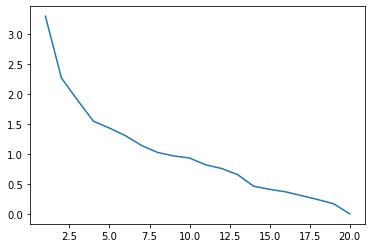

In [ ]:
x =data[data.columns] 
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

### To figure out how many factors we would need, we can look at eigenvalues, which is a measure of how much of the variance of the variables does a factor explain. An eigenvalue of more than one means that the factor explains more variance than a unique variable. 

### We will only use 4 factors here, given the big dropoff in eigenvalue after the 4th factor.

In [ ]:
fa = FactorAnalyzer(4, rotation='varimax')
fa.fit(x)
loads = fa.loadings_
print(loads)

[[ 0.11290652 -0.0248951   0.13055787 -0.66273013]
 [ 0.12110824 -0.09556954  0.0925534   0.30264134]
 [-0.09415948  0.0301161   0.18494576 -0.05705629]
 [-0.01147876 -0.01678374  0.01237766  0.274142  ]
 [ 0.01661135 -0.45388361  0.44740501  0.2337628 ]
 [ 0.25759586 -0.15118528  0.66058941 -0.15593647]
 [ 0.26127273  0.94168868  0.16994713 -0.03211283]
 [ 0.23578845  0.66031044  0.01934747  0.16403796]
 [-0.07621003  0.02678755 -0.01701679  0.09046209]
 [-0.14453024  0.0382726  -0.10084137 -0.27381192]
 [ 0.0102291   0.03831371 -0.0033528   0.64601019]
 [-0.40869567 -0.10554298 -0.32119583 -0.0914025 ]
 [-0.05115914 -0.04136806  0.36883685  0.17010942]
 [ 0.47046168  0.1611328   0.37321531  0.03964886]
 [-0.2648671   0.12292273  0.09756744  0.13849645]
 [ 0.0330022  -0.46768381  0.16954747  0.08193425]
 [ 0.90110988  0.2749228  -0.36424992  0.07673338]
 [ 0.03842207  0.03441681 -0.37117971  0.00986478]
 [ 0.82555617  0.30427955 -0.08480078  0.06544979]
 [-0.01144341  0.04332299 -0.04